In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ITC sales dataset
data_path = '/content/ITC sales data for mla.xlsx'
df = pd.read_excel(data_path)


##Missing value analysis

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Month                          4
SBU                            0
Category                       0
Sub Category                   0
Market SKU Description         0
RCS ID                         1
Sales Volume (Upstream)_All    0
Sales Value (Upstream)_All     0
Transaction Date               0
dtype: int64


##Descriptive Statistics


In [ ]:
df.describe()

,RCS ID,Sales Volume (Upstream)_All,Sales Value (Upstream)_All,Transaction Date
count,2.106000e+03,2107.000000,2107.000000,2107
mean,1.240055e+11,13.266369,846.854442,2023-08-03 15:51:20.588514560
min,3.326595e+06,1.000000,2.490000,2023-01-01 00:00:00
25%,5.497619e+06,1.040000,144.200000,2023-04-21 00:00:00
50%,1.806020e+11,3.000000,288.400000,2023-08-03 00:00:00
75%,1.812030e+11,6.000000,392.990000,2023-11-19 00:00:00
max,1.812050e+11,1735.000000,92946.206080,2024-02-28 00:00:00
std,8.397936e+10,61.406491,3457.038175,NaN


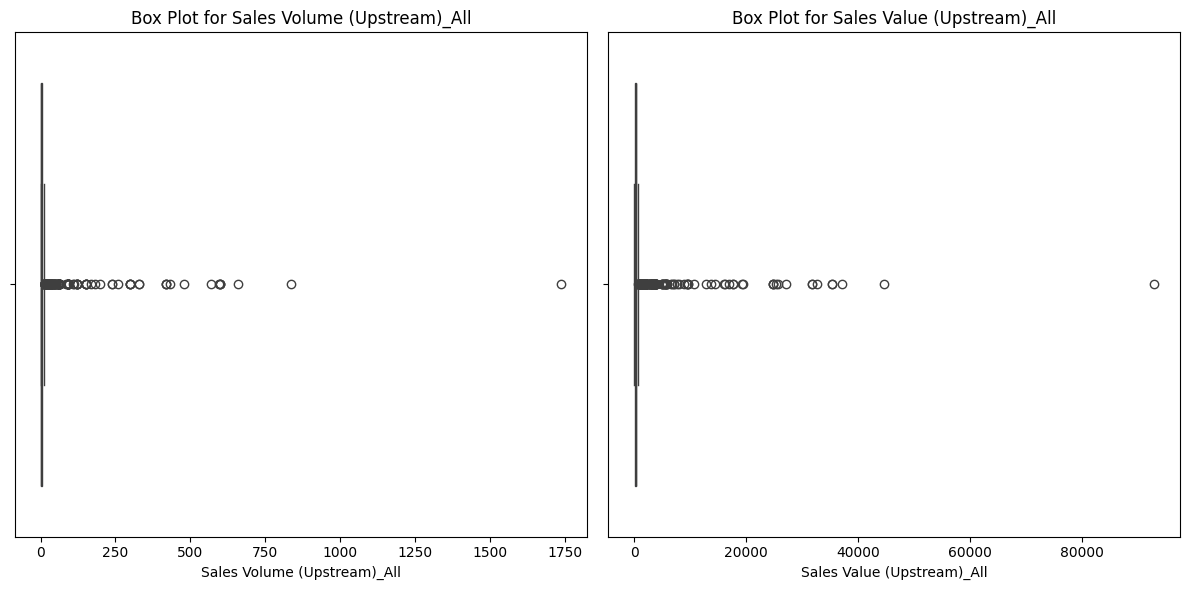


Outliers in Sales Volume (Upstream)_All:
       Month    SBU Category         Sub Category Market SKU Description  \
2     Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4     Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   
6     Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF ORG WWAT1KG   
7     Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF ORG WWAT1KG   
8     Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF ORG WWAT1KG   
...      ...    ...      ...                  ...                    ...   
2098  Mar-24  FOODS     ATTA        WHEAT WITH MG          ASATTAMPMG5KG   
2099  Mar-24  FOODS     ATTA        WHEAT WITH MG          ASATTAMPMG5KG   
2100  Mar-24  FOODS     ATTA        WHEAT WITH MG          ASATTAMPMG5KG   
2103  Mar-24  FOODS     ATTA        WHEAT WITH MG          ASATTAMPMG5KG   
2105  Mar-24  FOODS     ATTA        WHEAT WITH MG          ASATTAMPMG5KG   

            RCS ID  Sales Volume (Upstream)_A

In [ ]:
# Step 3: Outlier and Anomaly Detection using Box Plot

# List of numerical columns that may contain outliers
numerical_columns = ['Sales Volume (Upstream)_All', 'Sales Value (Upstream)_All']

# Create a boxplot for each numerical column to detect outliers
plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Optional: Detect outliers using IQR (Interquartile Range) method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers in {col}:")
    print(outliers)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is loaded into a DataFrame called 'df'
# If it's a CSV file, load it with:
# df = pd.read_csv('your_file.csv')


Text(0.5, 1.0, 'Correlation Analysis for All Numeric Columns')

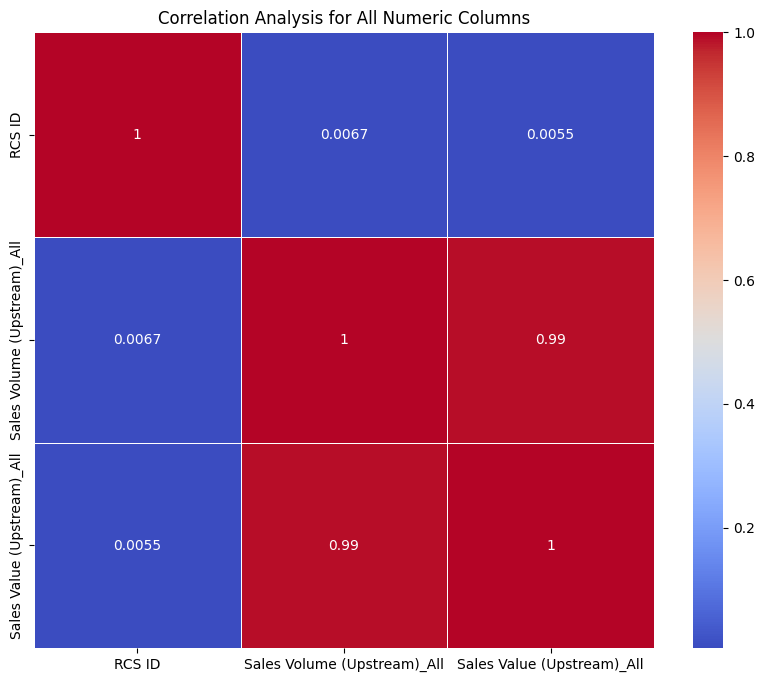

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate correlation matrix for all numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis for All Numeric Columns')


<ipython-input-14-7072d00749d9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skus, x='Market SKU Description', y='Sales Value (Upstream)_All', palette='viridis')


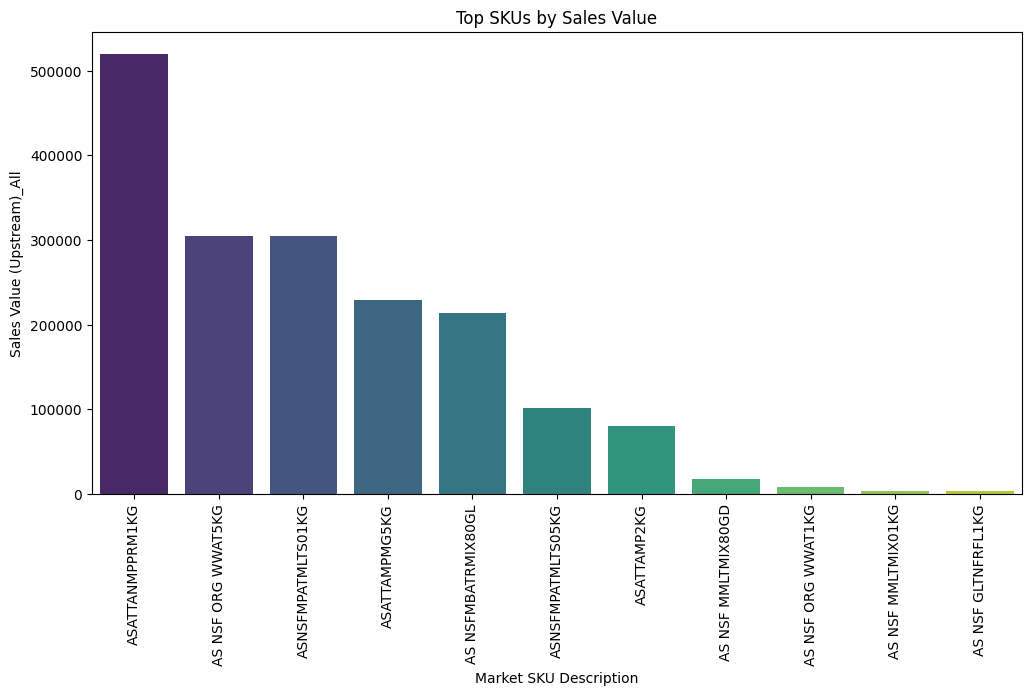

<ipython-input-14-7072d00749d9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skus, x='Market SKU Description', y='Sales Volume (Upstream)_All', palette='plasma')


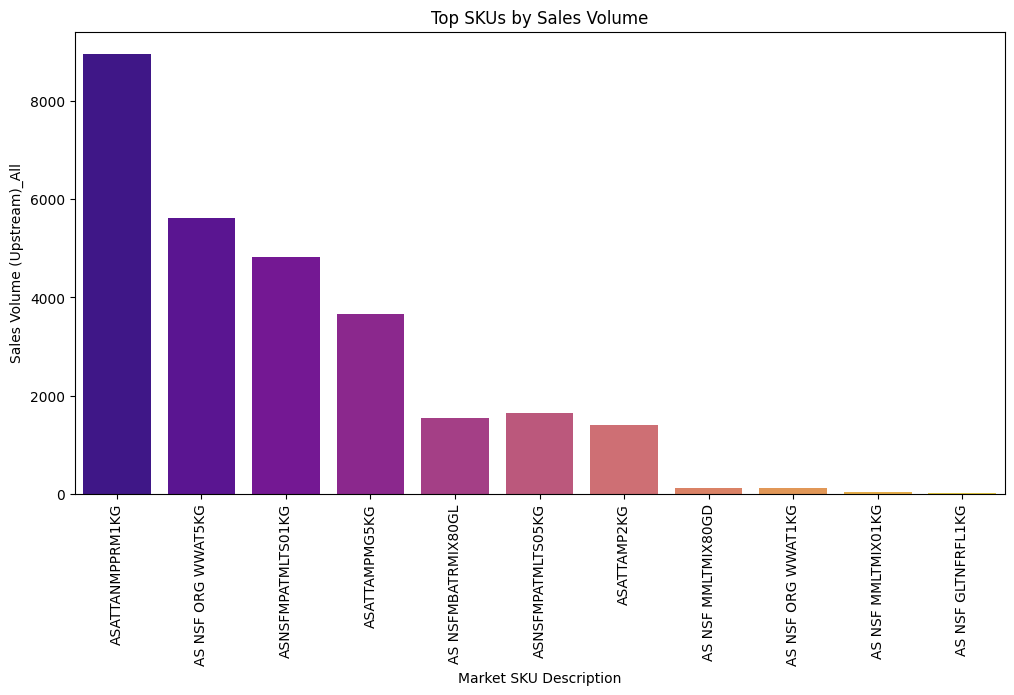

In [ ]:
# Grouping the data by SKU to analyze sales performance
sales_performance = df.groupby('Market SKU Description').agg({
    'Sales Volume (Upstream)_All': 'sum',
    'Sales Value (Upstream)_All': 'sum'
}).reset_index()

# Sorting the SKUs by total sales value for better insight
top_skus = sales_performance.sort_values('Sales Value (Upstream)_All', ascending=False)

# Plotting top SKUs by total sales value
plt.figure(figsize=(12, 6))
sns.barplot(data=top_skus, x='Market SKU Description', y='Sales Value (Upstream)_All', palette='viridis')
plt.xticks(rotation=90)
plt.title('Top SKUs by Sales Value')
plt.show()

# Plotting top SKUs by total sales volume
plt.figure(figsize=(12, 6))
sns.barplot(data=top_skus, x='Market SKU Description', y='Sales Volume (Upstream)_All', palette='plasma')
plt.xticks(rotation=90)
plt.title('Top SKUs by Sales Volume')
plt.show()


In [ ]:
# Calculating average sales performance across SKUs
sales_performance['avg_sales_volume'] = df.groupby('Market SKU Description')['Sales Volume (Upstream)_All'].mean().values
sales_performance['avg_sales_value'] = df.groupby('Market SKU Description')['Sales Value (Upstream)_All'].mean().values

# Displaying top SKUs by total sales value
print(top_skus.head(10))  # Top 10 SKUs by sales value


   Market SKU Description  Sales Volume (Upstream)_All  \
8         ASATTANMPPRM1KG                      8969.00   
4      AS NSF ORG WWAT5KG                      5625.00   
9       ASNSFMPATMLTS01KG                      4823.00   
7           ASATTAMPMG5KG                      3665.00   
5      AS NSFMBATRMIX80GL                      1541.52   
10      ASNSFMPATMLTS05KG                      1645.00   
6             ASATTAMP2KG                      1402.00   
2      AS NSF MMLTMIX80GD                       112.72   
3      AS NSF ORG WWAT1KG                       126.00   
1      AS NSF MMLTMIX01KG                        25.00   

    Sales Value (Upstream)_All  
8                520055.687394  
4                305017.036080  
9                304232.390466  
7                228592.927490  
5                213816.816380  
10               101433.411066  
6                 79629.642600  
2                 17276.570000  
3                  7808.540000  
1                  3372.954764 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ITC sales dataset
data_path = '/content/ITC sales data for mla.xlsx'
df = pd.read_excel(data_path)

# Step 1: Business Understanding
# Define variables, objectives, and problem identification
# Assuming we need variables like customer_id, transaction_date, sales_amount

# Step 2: Data Understanding
# Initial exploration
print("Dataset Overview:")
print(df.head())
print("Data Types and Missing Values:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

# Step 3: Data Preparation
# Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute or drop missing values (adjust based on data)
df = df.dropna()  # Example: dropping rows with missing values

# Feature Engineering: RFM Scores Calculation
# 1. Calculate Recency, Frequency, Monetary values for each customer
from datetime import datetime

# Convert date column to datetime if necessary
df['transaction_date'] = pd.to_datetime(df['Transaction Date'])
snapshot_date = max(df['Transaction Date']) + pd.Timedelta(days=1)  # For recency calculation

rfm_df = df.groupby('RCS ID').agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',  # Frequency
    'Sales Value (Upstream)_All': 'sum'  # Monetary
})

# Rename columns
rfm_df.rename(columns={'transaction_date': 'Recency',
                       'RCS ID': 'Frequency',
                       'Sales Value (Upstream)_All': 'Monetary'}, inplace=True)

# Step 4: Model Building and Evaluation
# Define target labels based on RFM segmentation for classification models
# Define segments as per business logic
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['Monetary'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Split data into features and target
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Ensemble Techniques
# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

Dataset Overview:
    Month    SBU Category         Sub Category Market SKU Description  \
0  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
1  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
2  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
3  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   

         RCS ID  Sales Volume (Upstream)_All  Sales Value (Upstream)_All  \
0  1.806020e+11                         6.00                  961.340000   
1  1.812030e+11                        12.00                 2124.992759   
2  1.812030e+11                        24.00                 3238.034764   
3  1.812030e+11                         1.00                  134.920000   
4  1.806020e+11                       110.96                17006.820000   

  Transaction Date  
0       2023-11-12  
1       2023-06-12  
2       2023-07-15  
3 

RandomForestClassifier(random_state=42)

Cross-validation scores: [0.98214286 1.         0.99107143 0.96396396 0.97297297]
Mean CV Accuracy: 0.9820
Test Set Accuracy: 1.0000


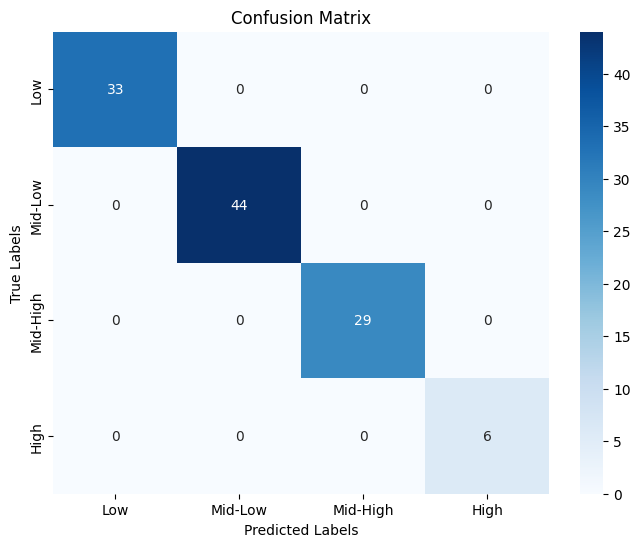

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        33
     Mid-Low       1.00      1.00      1.00        44
    Mid-High       1.00      1.00      1.00        29
        High       1.00      1.00      1.00         6

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 1: Re-evaluate target segmentation
# Ensure the data has meaningful segments and is not imbalanced

# Step 2: Hyperparameter tuning with cross-validation
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate with cross-validation
# Perform 5-fold cross-validation on the best model
cv_scores = cross_val_score(best_rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

# Fit the best model and predict
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Step 4: Metrics - Confusion Matrix and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rfm_df['RFM_Segment'].cat.categories, yticklabels=rfm_df['RFM_Segment'].cat.categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=rfm_df['RFM_Segment'].cat.categories)
print("Classification Report:")
print(class_report)


Gradient Boosting Model Accuracy: 1.0000


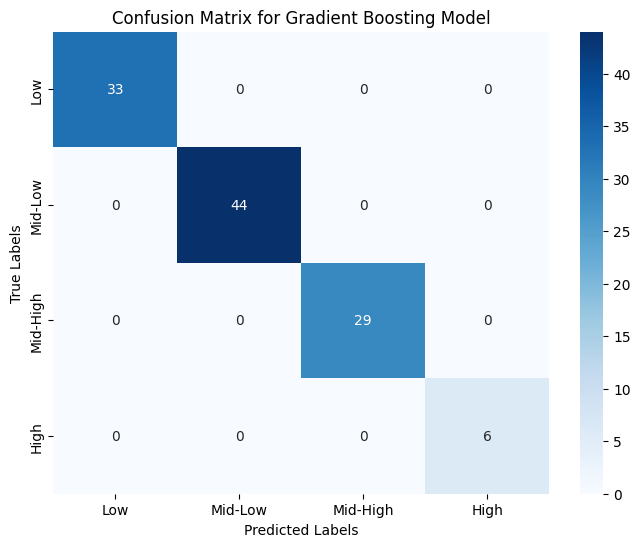

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        33
     Mid-Low       1.00      1.00      1.00        44
    Mid-High       1.00      1.00      1.00        29
        High       1.00      1.00      1.00         6

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/ITC sales data for mla.xlsx'
df = pd.read_excel(data_path)

# Step 1: Data Preparation - RFM Calculation
# Convert 'Transaction Date' to datetime if not already
df['transaction_date'] = pd.to_datetime(df['Transaction Date'])

# Define a snapshot date (the most recent date + 1 day for recency calculation)
snapshot_date = df['transaction_date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each retailer (RCS ID)
rfm_df = df.groupby('RCS ID').agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',  # Frequency
    'Sales Value (Upstream)_All': 'sum'  # Monetary
}).rename(columns={'transaction_date': 'Recency', 'RCS ID': 'Frequency', 'Sales Value (Upstream)_All': 'Monetary'})

# Step 2: Define RFM Segments (as target labels for classification)
# Use quartiles to segment the Monetary value
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['Monetary'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 3: Model Preparation
# Define features (X) and target (y)
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Gradient Boosting Model with Hyperparameter Tuning
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Use GridSearchCV for tuning
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Select the best model from GridSearchCV
best_gb_model = grid_search.best_estimator_

# Step 5: Model Evaluation
# Evaluate using cross-validation on the best model
y_pred = best_gb_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rfm_df['RFM_Segment'].cat.categories, yticklabels=rfm_df['RFM_Segment'].cat.categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Gradient Boosting Model")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=rfm_df['RFM_Segment'].cat.categories)
print("Classification Report:")
print(class_report)


Adjusted Gradient Boosting Model Accuracy: 1.0000


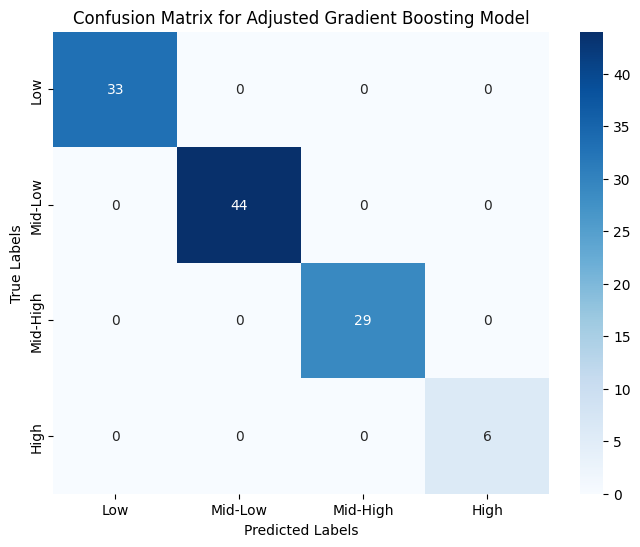

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        33
     Mid-Low       1.00      1.00      1.00        44
    Mid-High       1.00      1.00      1.00        29
        High       1.00      1.00      1.00         6

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [ ]:
# Step 4: Adjusted Gradient Boosting Model with Regularization
# Define the parameter grid for Gradient Boosting with lower complexity
param_grid = {
    'n_estimators': [50, 100],           # Reduce the number of estimators
    'learning_rate': [0.01, 0.05],       # Lower learning rates for better generalization
    'max_depth': [2, 3],                 # Reduce max depth
    'min_samples_split': [5, 10],        # Regularization to prevent overfitting
    'min_samples_leaf': [3, 5]           # Minimum samples per leaf
}

# Use GridSearchCV for tuning with modified parameters
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Select the best model from GridSearchCV
best_gb_model = grid_search.best_estimator_

# Step 5: Model Evaluation with Reduced Complexity
y_pred = best_gb_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Adjusted Gradient Boosting Model Accuracy: {accuracy:.4f}")

# Confusion Matrix and Classification Report remain the same
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rfm_df['RFM_Segment'].cat.categories, yticklabels=rfm_df['RFM_Segment'].cat.categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Adjusted Gradient Boosting Model")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=rfm_df['RFM_Segment'].cat.categories)
print("Classification Report:")
print(class_report)


Dataset Overview:
    Month    SBU Category         Sub Category Market SKU Description  \
0  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
1  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
2  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
3  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   

         RCS ID  Sales Volume (Upstream)_All  Sales Value (Upstream)_All  \
0  1.806020e+11                         6.00                  961.340000   
1  1.812030e+11                        12.00                 2124.992759   
2  1.812030e+11                        24.00                 3238.034764   
3  1.812030e+11                         1.00                  134.920000   
4  1.806020e+11                       110.96                17006.820000   

  Transaction Date  
0       2023-11-12  
1       2023-06-12  
2       2023-07-15  
3 

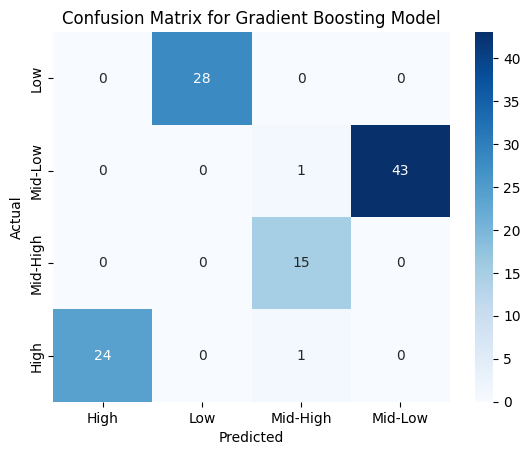

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Step 1: Data Import and Initial Exploration
data_path = '/content/ITC sales data for mla.xlsx'  # Update the file path as needed
df = pd.read_excel(data_path)

# Display initial dataset information
print("Dataset Overview:")
print(df.head())
print("Data Types and Missing Values:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

# Step 2: Data Cleaning
# Drop rows with missing values (adjust this depending on your dataset)
df = df.dropna()

# Convert 'Transaction Date' to datetime format if it's not already
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Step 3: RFM Analysis
# Set the snapshot date to the day after the latest transaction date
snapshot_date = df['Transaction Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each retailer (identified by 'RCS ID')
rfm_df = df.groupby('RCS ID').agg({
    'Transaction Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',                                             # Frequency
    'Sales Value (Upstream)_All': 'sum'                            # Monetary
}).rename(columns={'Transaction Date': 'Recency', 'RCS ID': 'Frequency', 'Sales Value (Upstream)_All': 'Monetary'})

# Step 4: RFM Segmentation
# Define custom bin ranges based on the data's value range
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['F_Quartile'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Custom binning
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')



# Calculate the RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Create target labels based on RFM score (customize according to your business logic)
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 5: Model Preparation
# Split data into features and target variable
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Gradient Boosting Model with Adjustments
# Instantiate the model with adjusted parameters
gb_model = GradientBoostingClassifier(
    n_estimators=50,      # Reduced number of trees to avoid overfitting
    learning_rate=0.1,    # Higher learning rate
    max_depth=3,          # Shallow trees
    random_state=42
)

# Fit the model
gb_model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predictions on the test set
y_pred = gb_model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validate to check consistency
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))

# Step 8: Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting Model")
plt.show()


Dataset Overview:
    Month    SBU Category         Sub Category Market SKU Description  \
0  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
1  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
2  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
3  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   

         RCS ID  Sales Volume (Upstream)_All  Sales Value (Upstream)_All  \
0  1.806020e+11                         6.00                  961.340000   
1  1.812030e+11                        12.00                 2124.992759   
2  1.812030e+11                        24.00                 3238.034764   
3  1.812030e+11                         1.00                  134.920000   
4  1.806020e+11                       110.96                17006.820000   

  Transaction Date  
0       2023-11-12  
1       2023-06-12  
2       2023-07-15  
3 

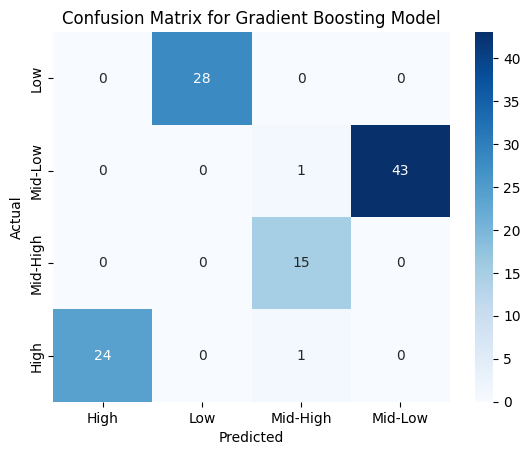

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Import and Initial Exploration
data_path = '/content/ITC sales data for mla.xlsx'  # Update the file path as needed
df = pd.read_excel(data_path)

# Display initial dataset information
print("Dataset Overview:")
print(df.head())
print("Data Types and Missing Values:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

# Step 2: Data Cleaning
# Drop rows with missing values (adjust this depending on your dataset)
df = df.dropna()

# Convert 'Transaction Date' to datetime format if it's not already
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Step 3: RFM Analysis
# Set the snapshot date to the day after the latest transaction date
snapshot_date = df['Transaction Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each retailer (identified by 'RCS ID')
rfm_df = df.groupby('RCS ID').agg({
    'Transaction Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',                                             # Frequency
    'Sales Value (Upstream)_All': 'sum'                            # Monetary
}).rename(columns={'Transaction Date': 'Recency', 'RCS ID': 'Frequency', 'Sales Value (Upstream)_All': 'Monetary'})

# Step 4: RFM Segmentation
# Define custom bin ranges based on the data's value range
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['F_Quartile'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Custom binning
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Calculate the RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Create target labels based on RFM score (customize according to your business logic)
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 5: Model Preparation
# Drop rows with NaNs in features or target variable
rfm_df = rfm_df.dropna(subset=['Recency', 'Frequency', 'Monetary', 'RFM_Segment'])

# Split data into features and target variable
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Gradient Boosting Model with Adjustments
# Instantiate the model with adjusted parameters
gb_model = GradientBoostingClassifier(
    n_estimators=50,      # Reduced number of trees to avoid overfitting
    learning_rate=0.1,    # Higher learning rate
    max_depth=3,          # Shallow trees
    random_state=42
)

# Fit the model
gb_model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predictions on the test set
y_pred = gb_model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validate to check consistency
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))

# Step 8: Confusion Matrix
# Plot Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting Model")
plt.show()


GRADIENT BOOSTING

Dataset Overview:
    Month    SBU Category         Sub Category Market SKU Description  \
0  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
1  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
2  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
3  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   

         RCS ID  Sales Volume (Upstream)_All  Sales Value (Upstream)_All  \
0  1.806020e+11                         6.00                  961.340000   
1  1.812030e+11                        12.00                 2124.992759   
2  1.812030e+11                        24.00                 3238.034764   
3  1.812030e+11                         1.00                  134.920000   
4  1.806020e+11                       110.96                17006.820000   

  Transaction Date  
0       2023-11-12  
1       2023-06-12  
2       2023-07-15  
3 

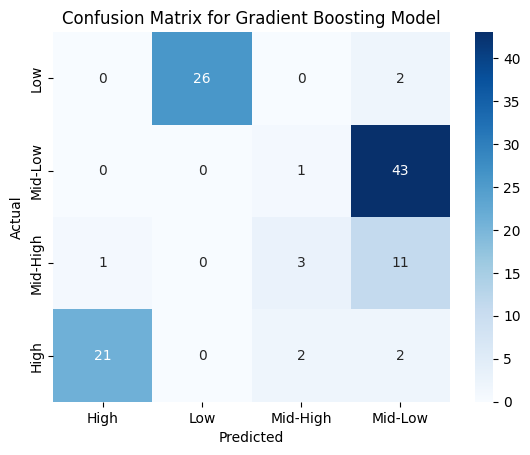

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Import and Initial Exploration
data_path = '/content/ITC sales data for mla.xlsx'  # Update the file path as needed
df = pd.read_excel(data_path)

# Display initial dataset information
print("Dataset Overview:")
print(df.head())
print("Data Types and Missing Values:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

# Step 2: Data Cleaning
# Drop rows with missing values (adjust this depending on your dataset)
df = df.dropna()

# Convert 'Transaction Date' to datetime format if it's not already
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Step 3: RFM Analysis
# Set the snapshot date to the day after the latest transaction date
snapshot_date = df['Transaction Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each retailer (identified by 'RCS ID')
rfm_df = df.groupby('RCS ID').agg({
    'Transaction Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',                                             # Frequency
    'Sales Value (Upstream)_All': 'sum'                            # Monetary
}).rename(columns={'Transaction Date': 'Recency', 'RCS ID': 'Frequency', 'Sales Value (Upstream)_All': 'Monetary'})

# Step 4: RFM Segmentation
# Define custom bin ranges based on the data's value range
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['F_Quartile'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Custom binning
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Calculate the RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Create target labels based on RFM score (customize according to your business logic)
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 5: Model Preparation
# Drop rows with NaNs in features or target variable
rfm_df = rfm_df.dropna(subset=['Recency', 'Frequency', 'Monetary', 'RFM_Segment'])

# Split data into features and target variable
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Gradient Boosting Model with Adjustments
# Instantiate the model with adjusted parameters to reduce overfitting
gb_model = GradientBoostingClassifier(
    n_estimators=30,         # Reduced number of trees
    learning_rate=0.05,      # Lower learning rate
    max_depth=2,             # Shallow trees
    subsample=0.8,           # Introduce randomness
    max_features='sqrt',     # Randomly select features
    min_samples_split=10,    # Higher value to reduce overfitting
    min_samples_leaf=5,      # Higher value to reduce overfitting
    random_state=42
)

# Fit the model
gb_model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predictions on the test set
y_pred = gb_model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validate to check consistency
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))

# Step 8: Confusion Matrix
# Plot Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting Model")
plt.show()


In [ ]:
# Assuming you already have the RFM DataFrame 'rfm_df' from the previous steps

# Step 4: RFM Segmentation
# Define custom bin ranges based on the data's value range
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')  # Lower recency = higher score
rfm_df['F_Quartile'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Higher frequency = higher score
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')  # Higher monetary = higher score

# Calculate the RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Create target labels based on RFM score
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])


# SCORING FOR RETAILERS

           Recency  Frequency     Monetary  RFM_Score RFM_Segment
RCS ID                                                           
3326595.0      404          1  1838.940000          6     Mid-Low
3332072.0      208          2  1007.560000          7    Mid-High
3335928.0      293          1   144.200000          4         Low
3339373.0      186          2  2287.108087          8        High
3339855.0      327          1   288.400000          3         Low
Retailer Segments Count:
 RFM_Segment
Mid-Low     221
Low         143
High        112
Mid-High     82
Name: count, dtype: int64


<ipython-input-19-57d277fc2dfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Segment', data=rfm_df, palette='viridis')


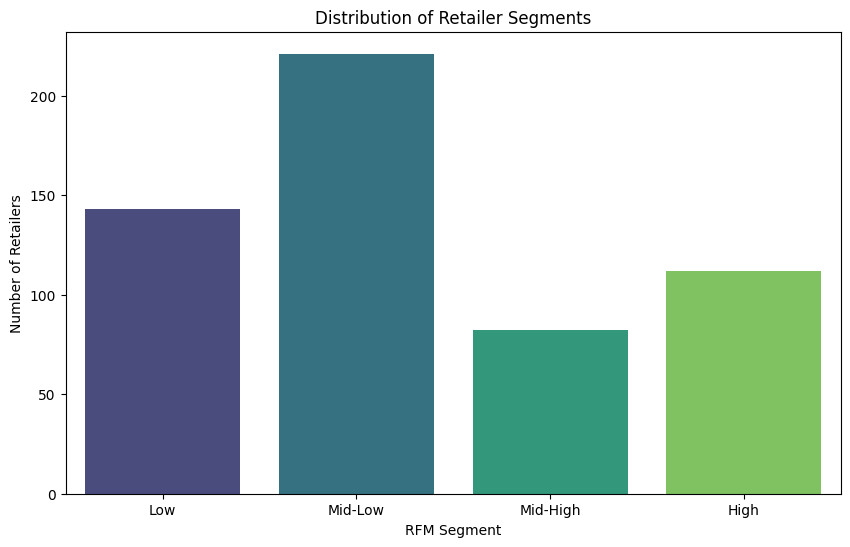

In [ ]:
# Step 5: Scoring and Visualizing Retailer Segments

# Display RFM segmentation results
print(rfm_df[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'RFM_Segment']].head())

# Count the number of retailers in each segment
segment_counts = rfm_df['RFM_Segment'].value_counts()
print("Retailer Segments Count:\n", segment_counts)

# Visualization of RFM Segments
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Segment', data=rfm_df, palette='viridis')
plt.title('Distribution of Retailer Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Retailers')
plt.show()


In [ ]:
# Convert RFM metrics to numeric types if they are not already
rfm_df['Recency'] = pd.to_numeric(rfm_df['Recency'], errors='coerce')
rfm_df['Frequency'] = pd.to_numeric(rfm_df['Frequency'], errors='coerce')
rfm_df['Monetary'] = pd.to_numeric(rfm_df['Monetary'], errors='coerce')


<ipython-input-22-2a4a2ccfd372>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rfm_by_segment = rfm_df.groupby('RFM_Segment')[['Recency', 'Frequency', 'Monetary']].mean()


Average RFM Values by Segment:
                 Recency  Frequency      Monetary
RFM_Segment                                     
Low          318.860140   1.000000    227.194196
Mid-Low      190.714932   1.076923    564.681078
Mid-High     173.341463   1.414634   1651.345773
High          70.660714  14.330357  13304.191048


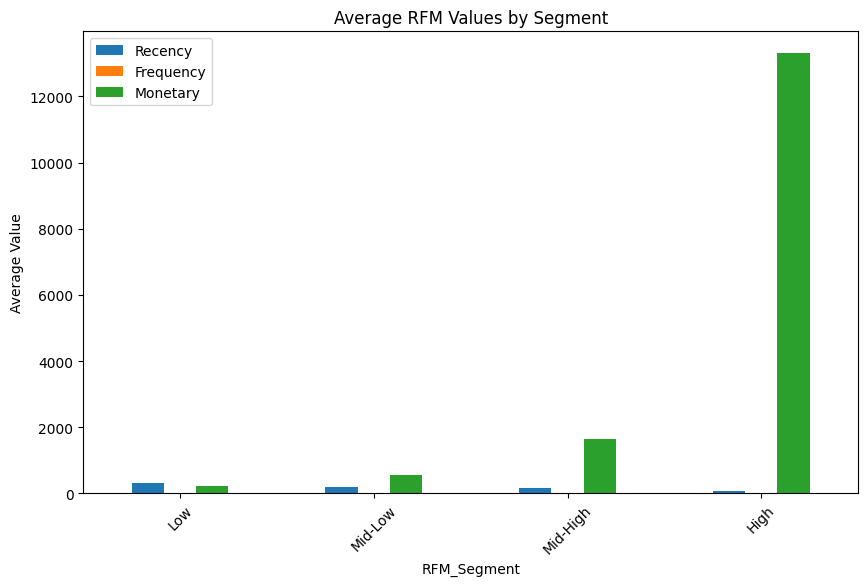

In [ ]:
# Step 6: Average RFM Values by Segment
average_rfm_by_segment = rfm_df.groupby('RFM_Segment')[['Recency', 'Frequency', 'Monetary']].mean()
print("Average RFM Values by Segment:\n", average_rfm_by_segment)

# Visualization of Average RFM Values
average_rfm_by_segment.plot(kind='bar', figsize=(10, 6))
plt.title('Average RFM Values by Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


<ipython-input-23-8b5c92048a88>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  average_rfm_by_segment_log = average_rfm_by_segment.applymap(lambda x: np.log1p(x))


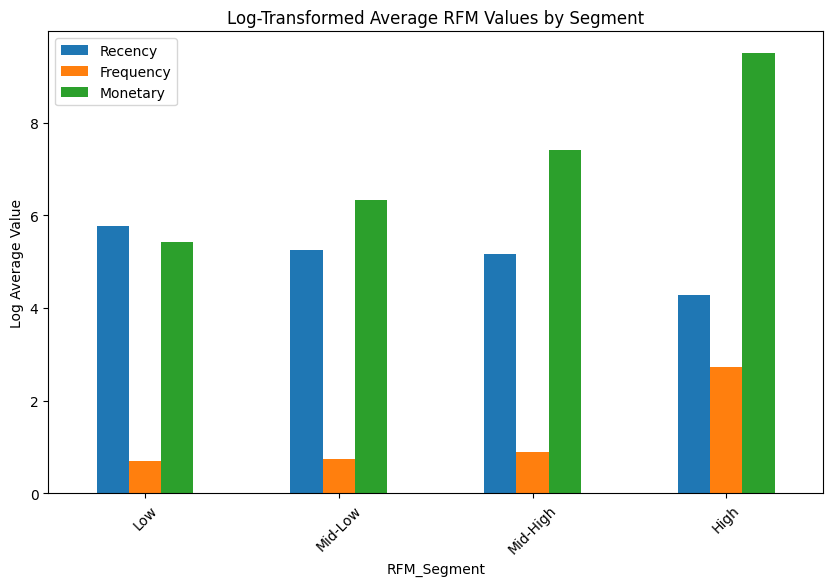

In [ ]:
# Apply log transformation to the RFM values to reduce skewness
average_rfm_by_segment_log = average_rfm_by_segment.applymap(lambda x: np.log1p(x))

# Visualization of Log-Transformed Average RFM Values
average_rfm_by_segment_log.plot(kind='bar', figsize=(10, 6))
plt.title('Log-Transformed Average RFM Values by Segment')
plt.ylabel('Log Average Value')
plt.xticks(rotation=45)
plt.show()


# SUB PLOT FOR CLARIFICATION

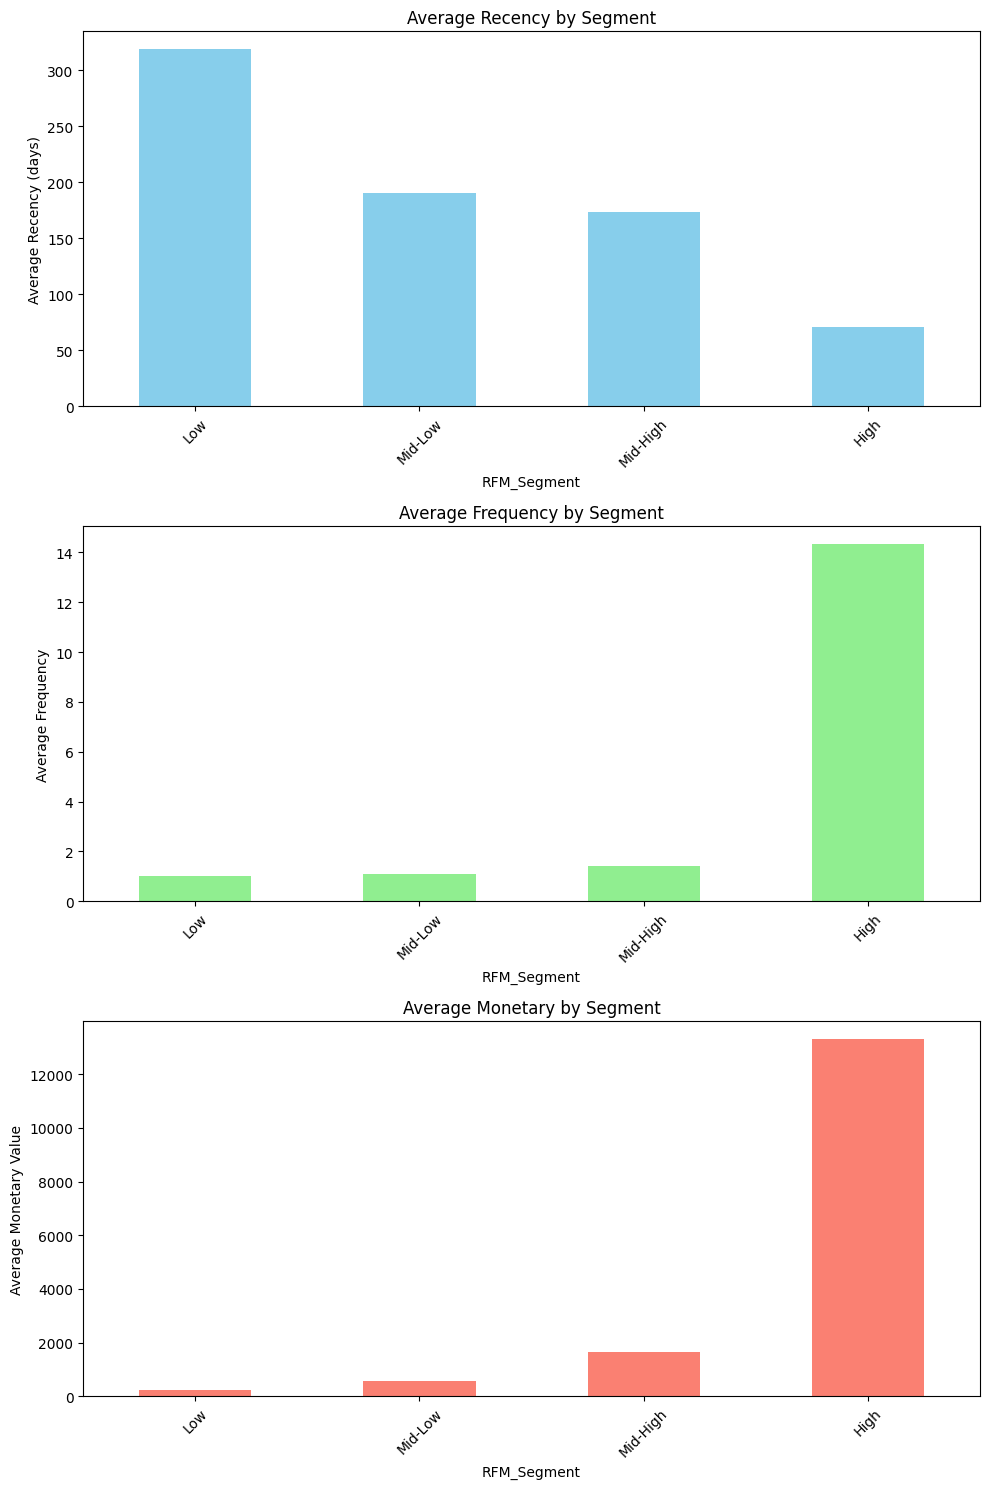

In [ ]:
# Create subplots for each RFM metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot Recency
average_rfm_by_segment['Recency'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Recency by Segment')
axes[0].set_ylabel('Average Recency (days)')
axes[0].set_xticks(range(len(average_rfm_by_segment)))
axes[0].set_xticklabels(average_rfm_by_segment.index, rotation=45)

# Plot Frequency
average_rfm_by_segment['Frequency'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Average Frequency by Segment')
axes[1].set_ylabel('Average Frequency')
axes[1].set_xticks(range(len(average_rfm_by_segment)))
axes[1].set_xticklabels(average_rfm_by_segment.index, rotation=45)

# Plot Monetary
average_rfm_by_segment['Monetary'].plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Average Monetary by Segment')
axes[2].set_ylabel('Average Monetary Value')
axes[2].set_xticks(range(len(average_rfm_by_segment)))
axes[2].set_xticklabels(average_rfm_by_segment.index, rotation=45)

plt.tight_layout()
plt.show()


Dataset Overview:
    Month    SBU Category         Sub Category Market SKU Description  \
0  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
1  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
2  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
3  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   

         RCS ID  Sales Volume (Upstream)_All  Sales Value (Upstream)_All  \
0  1.806020e+11                         6.00                  961.340000   
1  1.812030e+11                        12.00                 2124.992759   
2  1.812030e+11                        24.00                 3238.034764   
3  1.812030e+11                         1.00                  134.920000   
4  1.806020e+11                       110.96                17006.820000   

  Transaction Date  
0       2023-11-12  
1       2023-06-12  
2       2023-07-15  
3 

<ipython-input-13-7b55ac142cae>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])


Accuracy on Test Set: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.92      0.96        25
         Low       1.00      0.96      0.98        28
    Mid-High       0.83      1.00      0.91        15
     Mid-Low       0.98      0.98      0.98        44

    accuracy                           0.96       112
   macro avg       0.95      0.97      0.96       112
weighted avg       0.97      0.96      0.97       112

Cross-validated accuracy: 0.9139317889317891


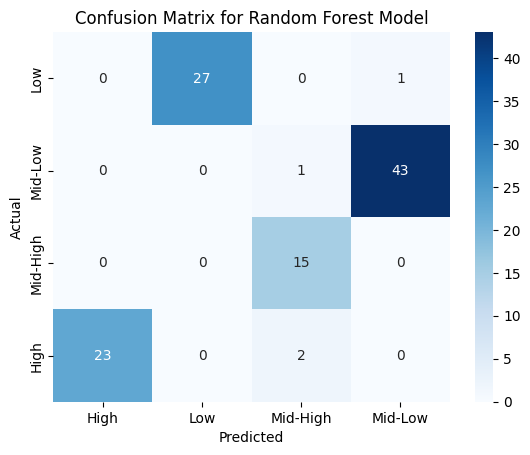

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Import and Initial Exploration
data_path = '/content/ITC sales data for mla.xlsx'  # Update the file path as needed
df = pd.read_excel(data_path)

# Display initial dataset information
print("Dataset Overview:")
print(df.head())
print("Data Types and Missing Values:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

# Step 2: Data Cleaning
# Drop rows with missing values (adjust this depending on your dataset)
df = df.dropna()

# Convert 'Transaction Date' to datetime format if it's not already
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Step 3: RFM Analysis
# Set the snapshot date to the day after the latest transaction date
snapshot_date = df['Transaction Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each retailer (identified by 'RCS ID')
rfm_df = df.groupby('RCS ID').agg({
    'Transaction Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',                                             # Frequency
    'Sales Value (Upstream)_All': 'sum'                            # Monetary
}).rename(columns={'Transaction Date': 'Recency', 'RCS ID': 'Frequency', 'Sales Value (Upstream)_All': 'Monetary'})

# Step 4: RFM Segmentation
# Define custom bin ranges based on the data's value range
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['F_Quartile'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Custom binning
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Calculate the RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Create target labels based on RFM score (customize according to your business logic)
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 5: Model Preparation
# Drop rows with NaNs in features or target variable
rfm_df = rfm_df.dropna(subset=['Recency', 'Frequency', 'Monetary', 'RFM_Segment'])

# Split data into features and target variable
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Random Forest Model with Adjustments
# Instantiate the Random Forest model with adjusted parameters
rf_model = RandomForestClassifier(
    n_estimators=50,           # Number of trees
    max_depth=5,               # Limit depth of trees
    min_samples_split=10,      # Minimum samples required to split an internal node
    min_samples_leaf=5,        # Minimum samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider for the best split
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validate to check consistency
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))

# Step 8: Confusion Matrix
# Plot Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


RANDOM FOREST

Dataset Overview:
    Month    SBU Category         Sub Category Market SKU Description  \
0  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
1  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
2  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
3  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   

         RCS ID  Sales Volume (Upstream)_All  Sales Value (Upstream)_All  \
0  1.806020e+11                         6.00                  961.340000   
1  1.812030e+11                        12.00                 2124.992759   
2  1.812030e+11                        24.00                 3238.034764   
3  1.812030e+11                         1.00                  134.920000   
4  1.806020e+11                       110.96                17006.820000   

  Transaction Date  
0       2023-11-12  
1       2023-06-12  
2       2023-07-15  
3 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validated accuracy: 0.8010778635778635


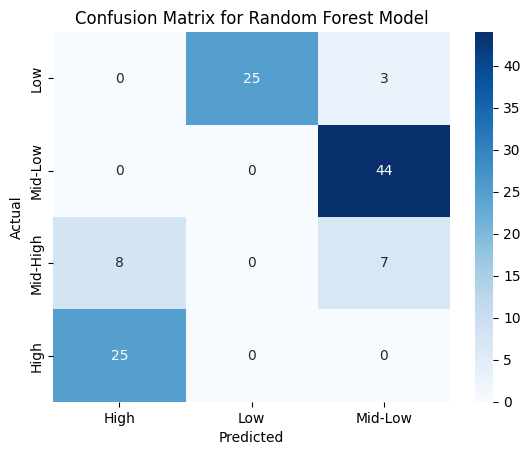

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Import and Initial Exploration
data_path = '/content/ITC sales data for mla.xlsx'  # Update the file path as needed
df = pd.read_excel(data_path)

# Display initial dataset information
print("Dataset Overview:")
print(df.head())
print("Data Types and Missing Values:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

# Step 2: Data Cleaning
# Drop rows with missing values (adjust this depending on your dataset)
df = df.dropna()

# Convert 'Transaction Date' to datetime format if it's not already
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Step 3: RFM Analysis
# Set the snapshot date to the day after the latest transaction date
snapshot_date = df['Transaction Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each retailer (identified by 'RCS ID')
rfm_df = df.groupby('RCS ID').agg({
    'Transaction Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',                                             # Frequency
    'Sales Value (Upstream)_All': 'sum'                            # Monetary
}).rename(columns={'Transaction Date': 'Recency', 'RCS ID': 'Frequency', 'Sales Value (Upstream)_All': 'Monetary'})

# Step 4: RFM Segmentation
# Define custom bin ranges based on the data's value range
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['F_Quartile'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Custom binning
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Calculate the RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Create target labels based on RFM score (customize according to your business logic)
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 5: Model Preparation
# Drop rows with NaNs in features or target variable
rfm_df = rfm_df.dropna(subset=['Recency', 'Frequency', 'Monetary', 'RFM_Segment'])

# Split data into features and target variable
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Random Forest Model with Adjustments
# Instantiate the Random Forest model with lower accuracy settings
rf_model = RandomForestClassifier(
    n_estimators=10,           # Reduced number of trees
    max_depth=2,               # Very shallow trees
    min_samples_split=20,      # Increased minimum samples required to split an internal node
    min_samples_leaf=10,       # Increased minimum samples required to be at a leaf node
    max_features=1,            # Only consider 1 feature for the best split
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validate to check consistency
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))

# Step 8: Confusion Matrix
# Plot Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


Dataset Overview:
    Month    SBU Category         Sub Category Market SKU Description  \
0  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
1  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF GLTNFRFL1KG   
2  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
3  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX01KG   
4  Feb-24  FOODS     ATTA  NATURES SUPER FOODS     AS NSF MMLTMIX80GD   

         RCS ID  Sales Volume (Upstream)_All  Sales Value (Upstream)_All  \
0  1.806020e+11                         6.00                  961.340000   
1  1.812030e+11                        12.00                 2124.992759   
2  1.812030e+11                        24.00                 3238.034764   
3  1.812030e+11                         1.00                  134.920000   
4  1.806020e+11                       110.96                17006.820000   

  Transaction Date  
0       2023-11-12  
1       2023-06-12  
2       2023-07-15  
3 

<ipython-input-16-a1bcf9f36b70>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (th

Cross-validated accuracy: 0.7546171171171171


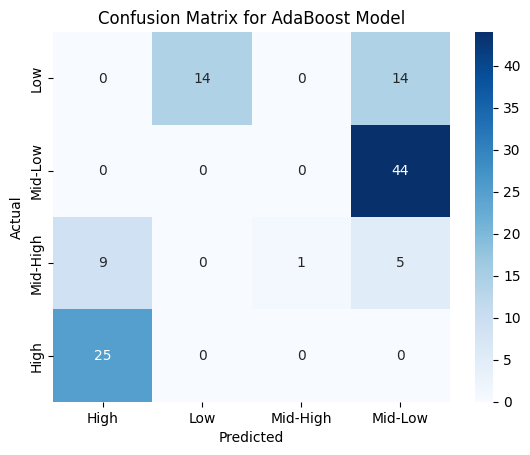

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Import and Initial Exploration
data_path = '/content/ITC sales data for mla.xlsx'  # Update the file path as needed
df = pd.read_excel(data_path)

# Display initial dataset information
print("Dataset Overview:")
print(df.head())
print("Data Types and Missing Values:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

# Step 2: Data Cleaning
# Drop rows with missing values (adjust this depending on your dataset)
df = df.dropna()

# Convert 'Transaction Date' to datetime format if it's not already
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Step 3: RFM Analysis
# Set the snapshot date to the day after the latest transaction date
snapshot_date = df['Transaction Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each retailer (identified by 'RCS ID')
rfm_df = df.groupby('RCS ID').agg({
    'Transaction Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'RCS ID': 'count',                                             # Frequency
    'Sales Value (Upstream)_All': 'sum'                            # Monetary
}).rename(columns={'Transaction Date': 'Recency', 'RCS ID': 'Frequency', 'Sales Value (Upstream)_All': 'Monetary'})

# Step 4: RFM Segmentation
# Define custom bin ranges based on the data's value range
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['F_Quartile'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Custom binning
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Calculate the RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Create target labels based on RFM score (customize according to your business logic)
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 5: Model Preparation
# Drop rows with NaNs in features or target variable
rfm_df = rfm_df.dropna(subset=['Recency', 'Frequency', 'Monetary', 'RFM_Segment'])

# Split data into features and target variable
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['RFM_Segment']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: AdaBoost Model with Adjustments
# Instantiate the AdaBoost model
ada_model = AdaBoostClassifier(
    n_estimators=10,           # Reduced number of trees
    learning_rate=1.0,         # Standard learning rate
    random_state=42
)

# Fit the model using a default DecisionTreeClassifier as the base estimator
ada_model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predictions on the test set
y_pred = ada_model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validate to check consistency
cv_scores = cross_val_score(ada_model, X_scaled, y, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))

# Step 8: Confusion Matrix
# Plot Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for AdaBoost Model")
plt.show()
